# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv('../df_aprov_cred.csv')

df.isna().sum() # Verificando se há algum missing

qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
sexo_F                                    0
sexo_M                                    0
posse_de_veiculo_N                        0
posse_de_veiculo_Y                        0
posse_de_imovel_N                         0
posse_de_imovel_Y                         0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher      

In [16]:
df.dtypes # conferindo os tipos

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_F                                      int64
sexo_M                                      int64
posse_de_veiculo_N                          int64
posse_de_veiculo_Y                          int64
posse_de_imovel_N                           int64
posse_de_imovel_Y                           int64
tipo_renda_Commercial associate             int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64


### Mapping

In [17]:
df.mau.unique()

array([False,  True])

In [18]:
df.mau = df.mau.map({True:1, False: 0})

In [19]:
df.mau.unique()

array([0, 1])

In [20]:
df.dtypes # conferindo se os tipos estão apenas os inteiros

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
sexo_F                                      int64
sexo_M                                      int64
posse_de_veiculo_N                          int64
posse_de_veiculo_Y                          int64
posse_de_imovel_N                           int64
posse_de_imovel_Y                           int64
tipo_renda_Commercial associate             int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64


## Separando as linhas de treino e teste

In [21]:
train = df.head(int(df.shape[0] * 0.7))
test = df.tail(int(df.shape[0] * 0.3))

### Separando as variaveis explicativas e target



In [23]:
y_train = train['mau'] # Target treino
x_train = train.drop('mau', axis=1) # Explicativas de treino

y_test = test['mau'] # Target teste
x_test = test.drop('mau', axis=1) # Explicativas de teste

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

### 1. Defina um objeto com a função da árvore de decisão vista em aula.

In [44]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [45]:
x_train.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_F,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [46]:
clf = clf.fit(x_train, y_train)
clf

DecisionTreeClassifier(random_state=100)

### 2. Treine o modelo com os dados que você separou para treinamento.

[Text(0.899636770932729, 0.98, '0 <= 11.827\ngini = 0.021\nsamples = 11655\nvalue = [11529, 126]\nclass = Ruim'),
 Text(0.8412582746898855, 0.94, '0 <= 11.801\ngini = 0.024\nsamples = 9628\nvalue = [9513, 115]\nclass = Ruim'),
 Text(0.8361692161657125, 0.9, '0 <= 11.725\ngini = 0.023\nsamples = 9627\nvalue = [9513, 114]\nclass = Ruim'),
 Text(0.7995648954357506, 0.86, '0 <= 0.5\ngini = 0.023\nsamples = 9613\nvalue = [9502, 111]\nclass = Ruim'),
 Text(0.741623429548346, 0.82, '0 <= 0.5\ngini = 0.022\nsamples = 9148\nvalue = [9048, 100]\nclass = Ruim'),
 Text(0.6689974952290076, 0.78, '0 <= 60.167\ngini = 0.023\nsamples = 8545\nvalue = [8446, 99]\nclass = Ruim'),
 Text(0.5491909192111959, 0.74, '0 <= 60.149\ngini = 0.025\nsamples = 7570\nvalue = [7476, 94]\nclass = Ruim'),
 Text(0.5441018606870229, 0.7, '0 <= 47.393\ngini = 0.024\nsamples = 7566\nvalue = [7474, 92]\nclass = Ruim'),
 Text(0.4063295165394402, 0.66, '0 <= 40.485\ngini = 0.021\nsamples = 5253\nvalue = [5197, 56]\nclass = Rui

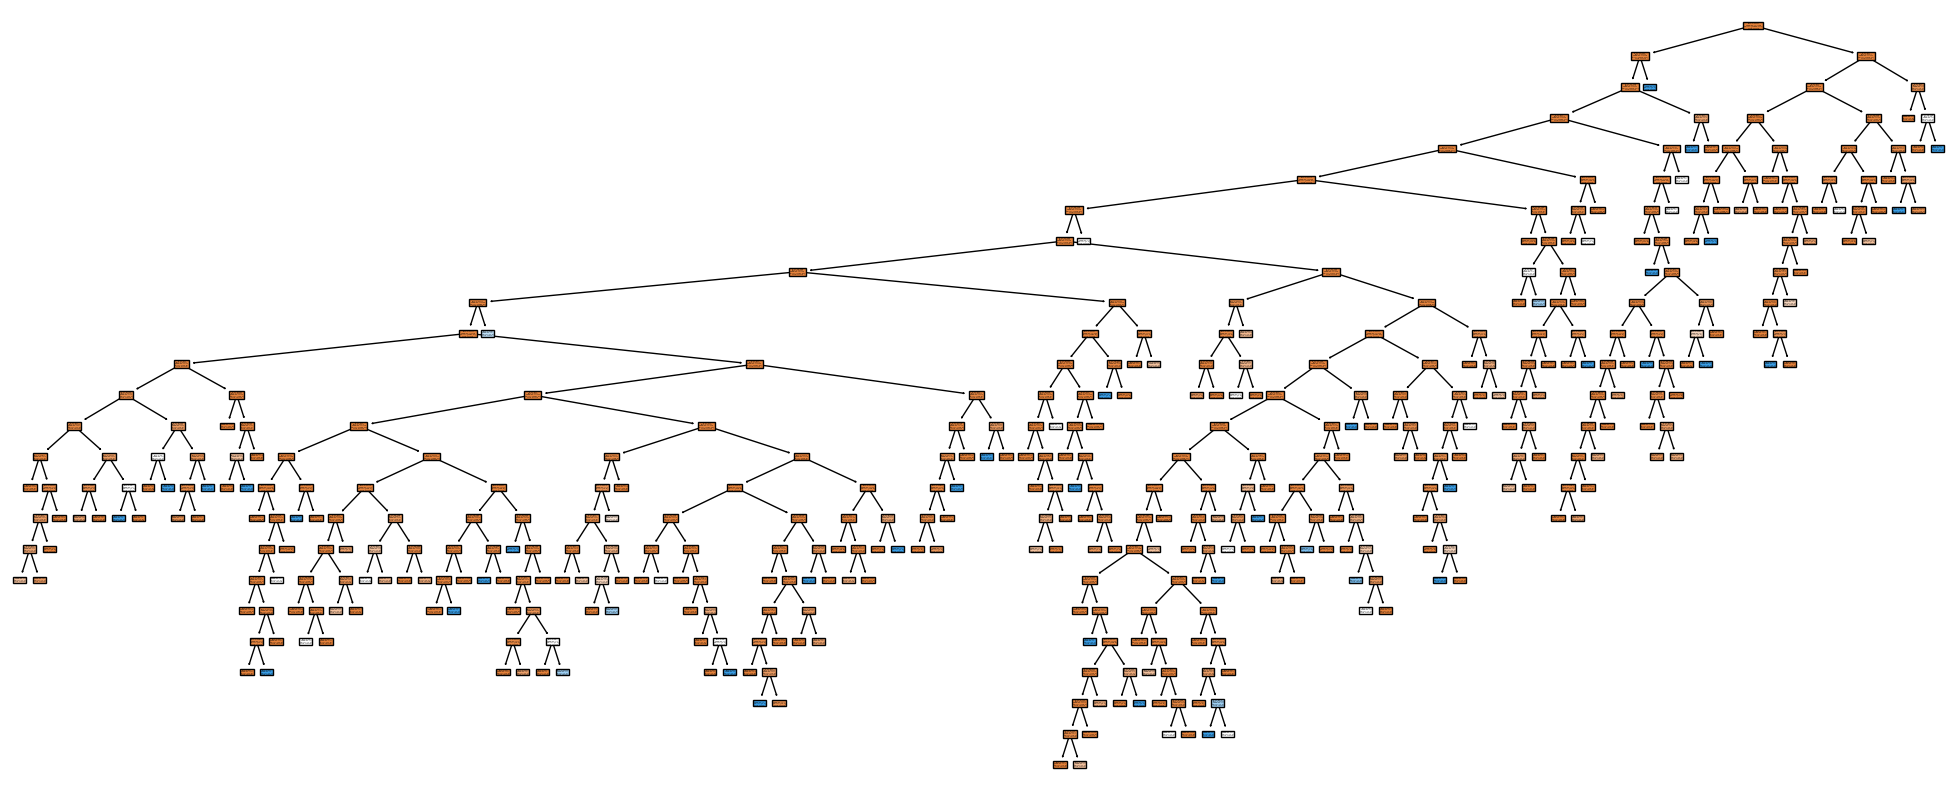

In [55]:
plt.figure(figsize=(25,10))
plot_tree(
    clf,
    filled=True,
    class_names=['Ruim', 'Bom'],
    feature_names=y_train
)


### 3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.


### 4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.

### 5. Calcule a acurácia na base de treinamento


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?